# Green Cart Ltd: Sales and Customer Behaviour Insights

## 1. Introduction and Objectives
1. Introduction

This analysis was conducted to support Green Cart Ltd.’s Q2 performance review by examining sales performance and customer behaviour across regions and product categories.

Using transactional sales data combined with customer and product attributes, the analysis aims to identify revenue drivers, customer value patterns, delivery performance issues, and the impact of discounts on purchasing behaviour.

The findings are intended to inform marketing prioritisation, operational improvements, and customer engagement strategies ahead of the next quarter.

## 2. Setup and Data Import

### 2.1 Library Import


In [1]:
# Importing the necessary libraries for data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.2 Data Loading
> Defining file paths and loading the three datasets (sales, product, customer info) into separate pandas DataFrames.

In [2]:
# Files have been extracted and uploaded directly to the /content/ directory in Colab.

SALES_PATH = "sales_data.csv"
PRODUCTS_PATH = "product_info.csv"
CUSTOMERS_PATH = "customer_info.csv"

# Load the datasets
try:
    sales_df = pd.read_csv(SALES_PATH)
    products_df = pd.read_csv(PRODUCTS_PATH)
    customers_df = pd.read_csv(CUSTOMERS_PATH)

    print("--- Sales Data (sales_df) Head & Info ---")
    print(sales_df.head())
    sales_df.info()

    print("\n--- Product Info (products_df) Head & Info ---")
    print(products_df.head())
    products_df.info()

    print("\n--- Customer Info (customers_df) Head & Info ---")
    print(customers_df.head())
    customers_df.info()

except FileNotFoundError as e:
    print(f"Error: One or more files were not found. Please ensure the files ({SALES_PATH}, {PRODUCTS_PATH}, {CUSTOMERS_PATH}) are uploaded and located in the /content/ directory in Colab.")
    print(f"Error details: {e}")

--- Sales Data (sales_df) Head & Info ---
  order_id customer_id product_id quantity  unit_price  order_date  \
0  O966977      C00397      P0022        3       39.25  06-07-2025   
1  O696648      C00236      P0023        5       18.92  06-07-2025   
2  O202644      C00492      P0011        1       29.68  07-07-2025   
3  O501803      C00031      P0003        1       32.76  08-07-2025   
4  O322242      C00495      P0016        1       47.62  08-07-2025   

  delivery_status payment_method   region  discount_applied  
0       Delivered         PayPal  Central              0.00  
1         DELAYED    credit card    North              0.00  
2       delivered  Bank Transfer    North              0.15  
3      Cancelled     Credit Card  Central              0.20  
4         DELAYED    Credit Card     West              0.20  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------

### 2.3 Initial Data Inspection Notes

After loading the data, the following observations were made regarding data quality and preparation requirements:

1.  **`sales_df` (Sales Data):**
    * The `quantity` column is incorrectly stored as an `object` (string) type and must be converted to `float` or `int`.
    * The `order_date` column is an `object` type and needs to be converted to the `datetime` format.
    * Missing values are present across multiple columns (`order_id`, `customer_id`, `product_id`, `quantity`, `order_date`, `discount_applied`).

2.  **`customers_df` (Customer Info):**
    * The categorical columns like `gender` and `loyalty_tier` show inconsistent capitalization and spelling (e.g., 'gold', 'GOLD', 'gld', 'femle'). These must be standardized.
    * Missing values are present in key customer identity fields.

3.  **Merging Keys:**
    * The primary sales table can be linked using **`product_id`** (to link to `products_df`) and **`customer_id`** (to link to `customers_df`).

These issues will be addressed in the next section (Section 3: Data Merging and Cleaning).

## 3. Data Merging and Cleaning

### 3.1 Data Type Conversion and Preparation

In [3]:
# Define file paths using the simplified filenames (assuming successful upload/extraction)
SALES_PATH = "sales_data.csv"
PRODUCTS_PATH = "product_info.csv"
CUSTOMERS_PATH = "customer_info.csv"

# Reload the data
sales_df = pd.read_csv(SALES_PATH)
products_df = pd.read_csv(PRODUCTS_PATH)
customers_df = pd.read_csv(CUSTOMERS_PATH)

# Convert 'quantity' to numeric (coercing non-numeric values to NaN)
sales_df['quantity'] = pd.to_numeric(sales_df['quantity'], errors='coerce')

# Convert date columns to datetime objects
sales_df['order_date'] = pd.to_datetime(sales_df['order_date'], format='%d-%m-%Y', errors='coerce')
products_df['launch_date'] = pd.to_datetime(products_df['launch_date'], format='%d-%m-%y', errors='coerce')
customers_df['signup_date'] = pd.to_datetime(customers_df['signup_date'], format='%d-%m-%y', errors='coerce')

# --- Verification Output for 3.1 ---
print("--- Verification of Data Types after 3.1 Conversion ---")
print("Sales DataFrame (sales_df) Dtypes:")
print(sales_df[['order_date', 'quantity']].dtypes)
print("\nProduct DataFrame (products_df) Dtypes:")
print(products_df['launch_date'].dtypes)
print("\nCustomer DataFrame (customers_df) Dtypes:")
print(customers_df['signup_date'].dtypes)

--- Verification of Data Types after 3.1 Conversion ---
Sales DataFrame (sales_df) Dtypes:
order_date    datetime64[ns]
quantity             float64
dtype: object

Product DataFrame (products_df) Dtypes:
datetime64[ns]

Customer DataFrame (customers_df) Dtypes:
datetime64[ns]


### 3.2 Merging DataFrames

>Merging the three dataframes to create a unified dataset for analysis.

In [4]:
# Perform Left Merges: sales -> products (on product_id) and then with customers (on customer_id).
# Using a 'left' merge ensures we keep all sales records.
merged_df = pd.merge(sales_df, products_df, on='product_id', how='left')
final_df = pd.merge(merged_df, customers_df, on='customer_id', how='left', suffixes=('_sales', '_customer'))

# Display the information for the newly merged DataFrame to check for integrity and null counts
print("--- Final Merged DataFrame Info (Before Final Cleaning) ---")
final_df.info()

print("\nHead of Merged Data:")
print(final_df.head(3))

--- Final Merged DataFrame Info (Before Final Cleaning) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          3003 non-null   object        
 1   customer_id       2998 non-null   object        
 2   product_id        2999 non-null   object        
 3   quantity          2999 non-null   float64       
 4   unit_price        3003 non-null   float64       
 5   order_date        3002 non-null   datetime64[ns]
 6   delivery_status   3001 non-null   object        
 7   payment_method    3001 non-null   object        
 8   region_sales      3004 non-null   object        
 9   discount_applied  2485 non-null   float64       
 10  product_name      2999 non-null   object        
 11  category          2999 non-null   object        
 12  launch_date       2999 non-null   datetime64[ns]
 13  base_price        

### 3.3 Consistency and Missing Value Handling

> Final cleaning step: standardizing text data, filling known nulls, and removing critical nulls.

> **Note:** Initial cleaning is performed here. Delivery status standardization is handled in Section 4 to align with specific feature engineering requirements for logistics analysis.

In [5]:
# 1. Standardize Categorical Data
# Standardizing gender and loyalty_tier by converting to lowercase and replacing inconsistencies.
final_df['gender'] = final_df['gender'].str.lower().str.strip().replace({'femle': 'female'})
final_df['loyalty_tier'] = final_df['loyalty_tier'].str.lower().str.strip().replace({
    'gld': 'gold',
    'brnze': 'bronze',
    'sllver': 'silver'
})
# Correcting the 'nrth' region typo identified in earlier steps
final_df['region_sales'] = final_df['region_sales'].replace({'nrth': 'North'})

# 2. Handle Missing Values
# Assume missing discount means 0% discount
final_df['discount_applied'] = final_df['discount_applied'].fillna(0.0)
# Drop rows with missing quantity (critical for calculating revenue)
final_df.dropna(subset=['quantity'], inplace=True)

# --- Verification Output for 3.3 ---
print("--- Final Cleaned DataFrame Info ---")
final_df.info()

print("\nStandardized Value Counts for Key Columns:")
print(f"Gender: {final_df['gender'].value_counts(dropna=False).to_dict()}")
print(f"Loyalty Tier: {final_df['loyalty_tier'].value_counts(dropna=False).to_dict()}")


--- Final Cleaned DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 2999 entries, 0 to 3003
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2998 non-null   object        
 1   customer_id       2993 non-null   object        
 2   product_id        2994 non-null   object        
 3   quantity          2999 non-null   float64       
 4   unit_price        2998 non-null   float64       
 5   order_date        2997 non-null   datetime64[ns]
 6   delivery_status   2996 non-null   object        
 7   payment_method    2996 non-null   object        
 8   region_sales      2999 non-null   object        
 9   discount_applied  2999 non-null   float64       
 10  product_name      2994 non-null   object        
 11  category          2994 non-null   object        
 12  launch_date       2994 non-null   datetime64[ns]
 13  base_price        2994 non-null   float64     

## 4. Feature Engineering and Data Filtering

### 4.1 Filter for Q2 (April - June)
> **CRITICAL:** The project brief specifically requests a **Q2 Performance Review**. We must filter the dataset to only include orders from April, May, and June.


In [6]:
# Create a month number column for filtering
final_df['Month_Num'] = final_df['order_date'].dt.month

# Filter: Keep only Month 4 (April), 5 (May), 6 (June)
# We create a new dataframe 'q2_data' to ensure we don't accidentally use the full year data later
q2_data = final_df[final_df['Month_Num'].isin([4, 5, 6])].copy()

# Overwrite final_df so all subsequent analysis uses the correct Q2 data
final_df = q2_data

print(f"Data filtered for Q2 (Apr-Jun).")
print(f"Row count reduced from {len(sales_df)} to {len(final_df)} transactions.")

Data filtered for Q2 (Apr-Jun).
Row count reduced from 3000 to 1423 transactions.


### 4.2 Revenue Calculation
> Calculating Total Price and Net Revenue (after discount).

> Note: In this analysis, the calculated variable Net_Revenue represents the final Revenue metric (Price - Discount) used for all business questions.

In [7]:
# Calculate Total Price (Quantity * Unit Price)
final_df['Total_Price'] = final_df['quantity'] * final_df['unit_price']

# Calculate Net Revenue (Total Price - Discount)
# Note: discount_applied is a decimal (e.g., 0.10 for 10%), so we multiply by (1 - discount)
final_df['Net_Revenue'] = final_df['Total_Price'] * (1 - final_df['discount_applied'])

print("Revenue features created: 'Total_Price', 'Net_Revenue'")

Revenue features created: 'Total_Price', 'Net_Revenue'


### 4.3 Time & Logistics Features
> Creating `order_week` for time trends and `is_late` for delivery performance analysis as requested in the brief.

In [8]:
# Displaying descriptive statistics for the newly created revenue metrics.

# 1. Time Features
final_df['Order_Month'] = final_df['order_date'].dt.to_period('M')
final_df['Order_Year'] = final_df['order_date'].dt.year
final_df['order_week'] = final_df['order_date'].dt.isocalendar().week

# 2. Logistics: Is_Late?
# Clean the text first to handle "DELAYED", "Delayed", "delayed"
final_df['delivery_status'] = final_df['delivery_status'].str.lower().str.strip()
final_df['is_late'] = final_df['delivery_status'] == 'delayed'

print("Time & Logistics features created: 'Order_Month', 'order_week', 'is_late'")

Time & Logistics features created: 'Order_Month', 'order_week', 'is_late'


### 4.4 Customer & Product Features
> Extracting `email_domain` for marketing and creating `price_band` for product segmentation.

In [9]:
# 1. Email Domain (Extracting value after '@')
final_df['email_domain'] = final_df['email'].str.split('@').str[1]

# 2. Price Band (Categorizing Unit Price)
def classify_price(price):
    if price < 15:
        return 'Low'
    elif price < 30:
        return 'Medium'
    else:
        return 'High'

final_df['price_band'] = final_df['unit_price'].apply(classify_price)

# 3. Days to Order
# Calculating how many days after launch the product was ordered
# We use 'launch_date' which came from the products_df merge
final_df['days_to_order'] = (final_df['order_date'] - final_df['launch_date']).dt.days

print("Customer & Product features created: 'email_domain', 'price_band', 'days_to_order'")

Customer & Product features created: 'email_domain', 'price_band', 'days_to_order'


### 4.5 Final Feature Review
> Verifying the new dataframe structure before starting analysis.

In [10]:
# Check the first few rows to ensure all new columns exist
cols_to_check = ['order_date', 'Net_Revenue', 'order_week', 'is_late', 'price_band', 'email_domain']
print("--- Preview of Engineered Data (Q2 Only) ---")
print(final_df[cols_to_check].head())

# Quick Stat: How many late orders?
late_count = final_df['is_late'].sum()
print(f"\nTotal Late Orders in Q2: {late_count}")

--- Preview of Engineered Data (Q2 Only) ---
   order_date  Net_Revenue  order_week  is_late price_band email_domain
48 2025-06-30      40.8960          27     True       High    yahoo.com
49 2025-06-29     111.2500          26    False     Medium    brown.com
50 2025-06-28     114.9025          26    False     Medium    stone.com
51 2025-06-27     132.2800          26     True       High    gmail.com
52 2025-06-26      69.3200          26     True     Medium    yahoo.com

Total Late Orders in Q2: 561


## 5. Sales and Customer Behaviour Insights (Q2 Focus)

> **Objective:** This section addresses the key business questions for the Q2 review:
> 1. **Weekly Trends:** When did revenue peak?
> 2. **Delivery Performance:** Which regions are facing shipping delays?
> 3. **Revenue Drivers:** How do discounts and price bands impact sales?

### 5.1 Weekly Sales Trend (Q2)
> **Business Question:** Are there specific weeks where sales spiked or dropped?

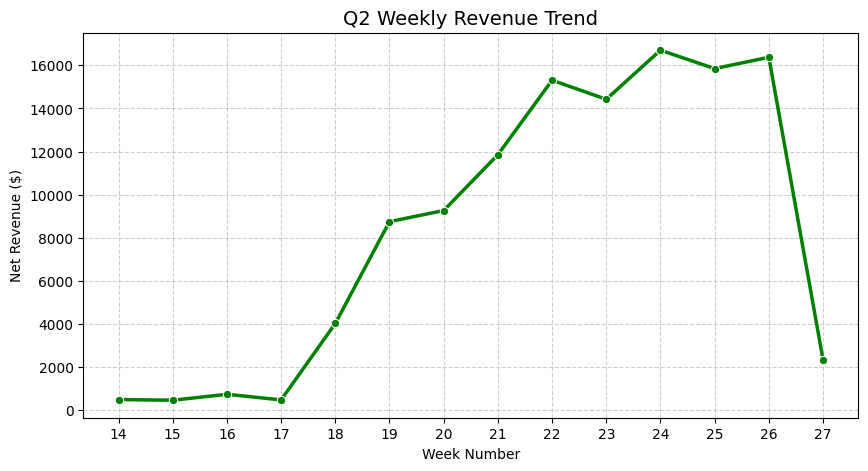

Key Finding: Revenue peaked in Week 24.


In [11]:
# Group by Week Number to see trends
weekly_sales = final_df.groupby('order_week')['Net_Revenue'].sum()

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(x=weekly_sales.index, y=weekly_sales.values, marker='o', color='green', linewidth=2.5)

# Formatting
plt.title('Q2 Weekly Revenue Trend', fontsize=14)
plt.xlabel('Week Number')
plt.ylabel('Net Revenue ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(weekly_sales.index) # Ensure all weeks are shown
plt.show()

# Insight Printout
peak_week = weekly_sales.idxmax()
print(f"Key Finding: Revenue peaked in Week {peak_week}.")

### 5.2 Delivery Performance Analysis
> **Business Question:** We need to improve operations. Which regions have the highest rate of late deliveries?

/tmp/ipython-input-24185682.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delivery_performance.index, y=delivery_performance.values, palette=colors)


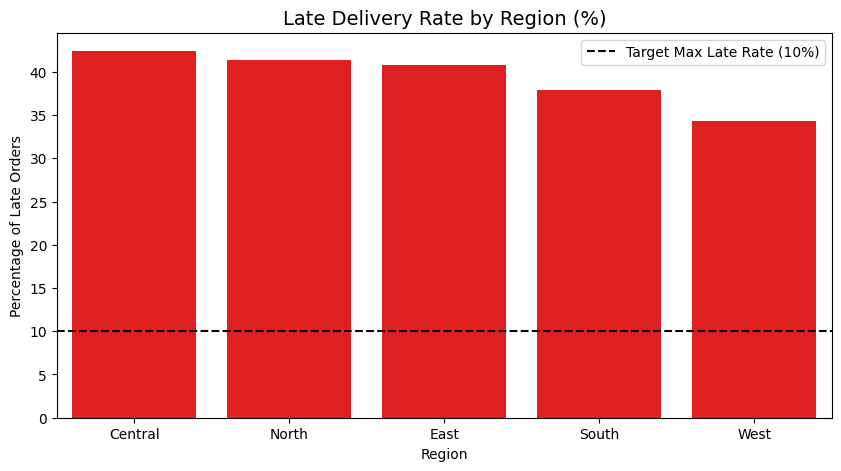

Operational Risk: Regions with red bars are exceeding the late delivery threshold.


In [12]:
# Calculate Late Percentage by Region
# We use 'mean' on the boolean 'is_late' column to get the percentage (True=1, False=0)
delivery_performance = final_df.groupby('region_sales')['is_late'].mean() * 100
delivery_performance = delivery_performance.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 5))
colors = ['red' if x > 15 else 'grey' for x in delivery_performance.values] # Highlight problem areas
sns.barplot(x=delivery_performance.index, y=delivery_performance.values, palette=colors)

# Formatting
plt.title('Late Delivery Rate by Region (%)', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Percentage of Late Orders')
plt.axhline(10, color='black', linestyle='--', label='Target Max Late Rate (10%)') # Hypothetical target
plt.legend()
plt.show()

print("Operational Risk: Regions with red bars are exceeding the late delivery threshold.")

### 5.3 Impact of Discounts on Volume
> **Business Question:** Do higher discounts actually drive customers to buy more quantities?

/tmp/ipython-input-2470223874.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='discount_applied', y='quantity', data=final_df, palette='coolwarm')


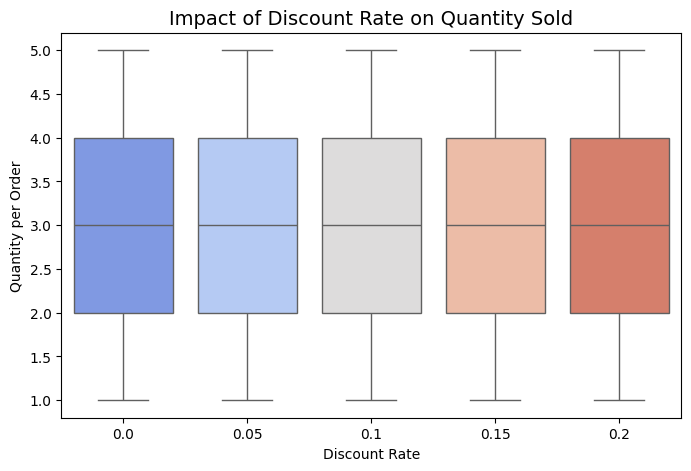

Statistical Insight: The correlation between discount and quantity is -0.02.
-> Interpretation: Discounts are NOT strongly driving bulk purchases. Strategy review needed.


In [13]:
# Plotting relationship between Discount % and Quantity Sold
plt.figure(figsize=(8, 5))
sns.boxplot(x='discount_applied', y='quantity', data=final_df, palette='coolwarm')

# Formatting
plt.title('Impact of Discount Rate on Quantity Sold', fontsize=14)
plt.xlabel('Discount Rate')
plt.ylabel('Quantity per Order')
plt.show()

# Correlation Check
corr = final_df['discount_applied'].corr(final_df['quantity'])
print(f"Statistical Insight: The correlation between discount and quantity is {corr:.2f}.")
if corr < 0.3:
    print("-> Interpretation: Discounts are NOT strongly driving bulk purchases. Strategy review needed.")

### 5.4 Revenue Drivers: Price Band Analysis
> **Business Question:** Which price point (Low/Medium/High) generates the most revenue?

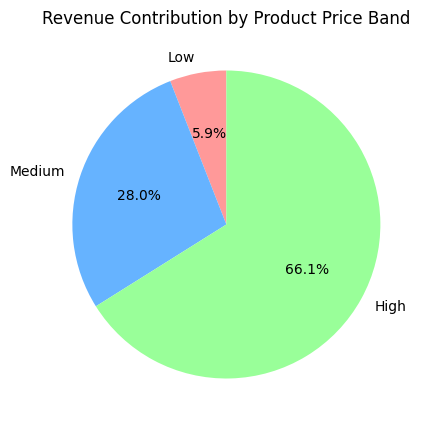

Strategic Insight: This chart shows which product tier carries the business.


In [14]:
# Aggregate revenue by Price Band
band_revenue = final_df.groupby('price_band')['Net_Revenue'].sum().reindex(['Low', 'Medium', 'High'])

# Plotting
plt.figure(figsize=(8, 5))
band_revenue.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'], startangle=90)
plt.title('Revenue Contribution by Product Price Band')
plt.ylabel('') # Hide y-label for clean look
plt.show()

print("Strategic Insight: This chart shows which product tier carries the business.")

### 5.5 Regional Product Performance (Heatmap)
> **Business Question:** Which product categories are driving revenue in specific regions?
> **Why this matters:** This heatmap identifies "hot spots" (high revenue) and "cold spots" (missed opportunities) to help target marketing efforts.

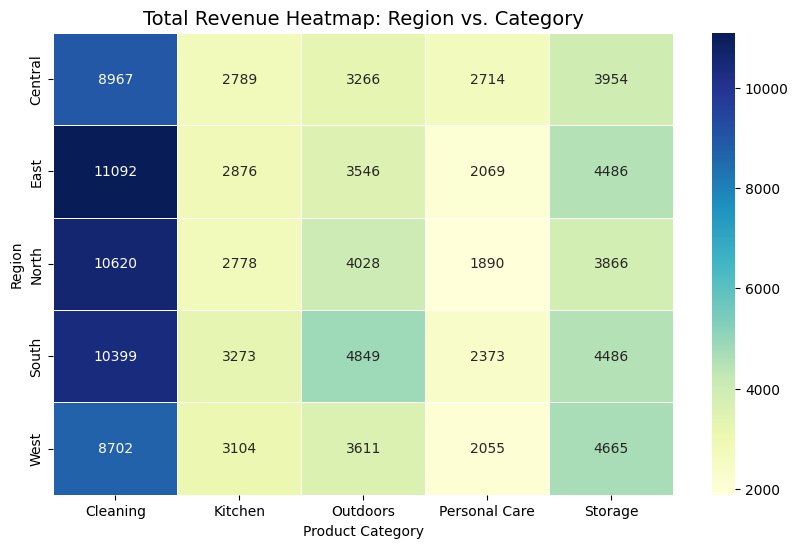

Insight: Darker blue boxes indicate our strongest regional markets.


In [15]:
# Create a Pivot Table: Rows=Region, Cols=Category, Values=Revenue
# Note: Ensure 'region' is the correct column name from your dataframe (it might be 'region_x' if you merged with customer data)
heatmap_data = final_df.pivot_table(values='Net_Revenue',
                                    index='region_sales', # Changed from 'region' to 'region_sales'
                                    columns='category',
                                    aggfunc='sum')

# Plotting the Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)

# Formatting
plt.title('Total Revenue Heatmap: Region vs. Category', fontsize=14)
plt.ylabel('Region')
plt.xlabel('Product Category')
plt.show()

print("Insight: Darker blue boxes indicate our strongest regional markets.")